In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../core/')

In [6]:
from scipy.stats import chi2, norm

In [11]:
import numpy as np

In [15]:
2666.57 - 2519.16

147.4100000000003

In [28]:
chi2.sf(130, 1)

4.097776494844903e-30

In [31]:
norm.sf(11.3)

6.560899940904078e-30

In [18]:
import numpy as np
import pickle
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from scipy.interpolate import RegularGridInterpolator, splrep, splev
from scipy.stats import gaussian_kde
from settings import LIVETIME, GAMMA_ASTRO, PHI_ASTRO, poles
from tools import get_mids

from aeff_calculations import aeff_eval_e_sd, get_aeff_and_binnings, setup_aeff_grid, aeff_rotation
from settings import *

In [11]:
aeff_2d, log_ebins, ebins, sindec_bins, ra_bins = get_aeff_and_binnings("full")
emids = get_mids(ebins)
ewidth = np.diff(ebins)
sindec_mids = get_mids(sindec_bins)
sindec_width = np.diff(sindec_bins)
ra_width = np.diff(ra_bins)
ra_mids = get_mids(ra_bins)

In [72]:
aeff_dummy = np.zeros_like(aeff_2d["IceCube"])
aeff_dummy[:,sindec_mids > 0] = 1
grid2d, eq_coords = setup_aeff_grid(
    aeff_dummy, sindec_mids, ra_mids, ra_width)
generic_rotation = {}
threshold = 0.32
for k in ["KM3NeT"]:
    generic_rotation[k] = aeff_rotation(poles[k]["lat"], 0, eq_coords, grid2d, ra_width)
    print(k, ":")
    print("latitude:", poles[k]["lat"])
    print(len(generic_rotation[k][0][generic_rotation[k][0] > threshold]) / len(generic_rotation[k][0]))

KM3NeT :
latitude: 36.266666666666666 deg
0.78


In [73]:
aeff_dummy = np.zeros_like(aeff_2d["IceCube"])
aeff_dummy[:,sindec_mids > np.sin(np.deg2rad(-5))] = 1
grid2d, eq_coords = setup_aeff_grid(
    aeff_dummy, sindec_mids, ra_mids, ra_width)
generic_rotation = {}
threshold = 0.32
for k in ["Baikal-GVD"]:
    generic_rotation[k] = aeff_rotation(poles[k]["lat"], 0, eq_coords, grid2d, ra_width)
    print(k, ":")
    print("latitude:", poles[k]["lat"])
    print(len(generic_rotation[k][0][generic_rotation[k][0] > threshold]) / len(generic_rotation[k][0]))

Baikal-GVD :
latitude: 53.5587 deg
0.72


threshold 0.32
IceCube
0.5
KM3NeT :
latitude: 36.266666666666666 deg
0.78
Baikal-GVD :
latitude: 53.5587 deg
0.68
P-ONE :
latitude: 48.4284 deg
0.7
 _ * - _ * - _ * - _ * - _ * -


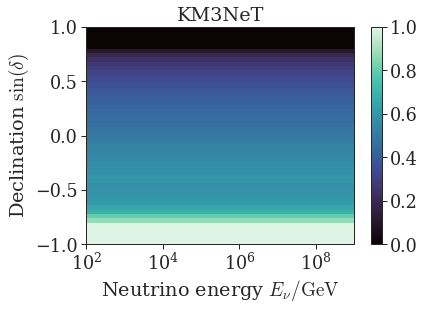

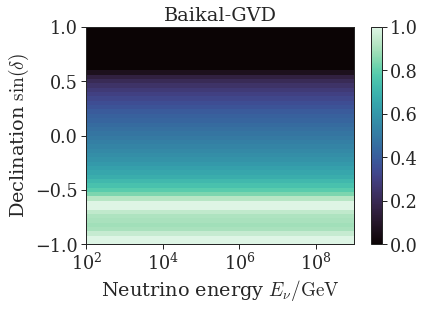

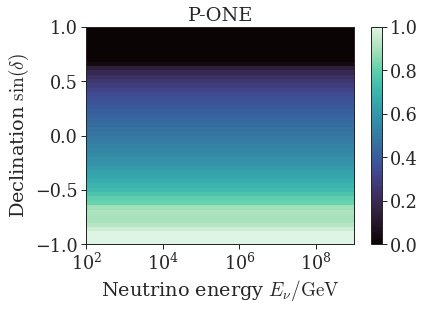

In [84]:
aeff_dummy = np.zeros_like(aeff_2d["IceCube"])
aeff_dummy[:,sindec_mids > 0] = 1
#aeff_dummy[:,sindec_mids > np.sin(np.deg2rad(-5))] = 1
#threshold = 0
for threshold in [0.32]:
    print("threshold", threshold)
    print("IceCube")
    print(len(aeff_dummy[0][aeff_dummy[0] > threshold]) / len(aeff_dummy[0]))
    grid2d, eq_coords = setup_aeff_grid(
        aeff_dummy, sindec_mids, ra_mids, ra_width)
    generic_rotation = {}
    for k in ["KM3NeT", "Baikal-GVD", "P-ONE"]:
        generic_rotation[k] = aeff_rotation(poles[k]["lat"], 0, eq_coords, grid2d, ra_width)
        print(k, ":")
        print("latitude:", poles[k]["lat"])
        print(len(generic_rotation[k][0][generic_rotation[k][0] >= threshold]) / len(generic_rotation[k][0]))
        f, ax = plt.subplots()
        p = ax.pcolormesh(
            ebins,
            sindec_bins, 
            generic_rotation[k].T,
        )
        ax.set_xscale("log")
        ax.set_xlim(1E2, 1E9)
        ax.set_ylabel(r'Declination $\sin(\delta)$')
        ax.set_xlabel(r'Neutrino energy $E_\nu/{\rm GeV}$')
        ax.set_title(k)
        f.colorbar(p)
    print(" _ * -" * 5)

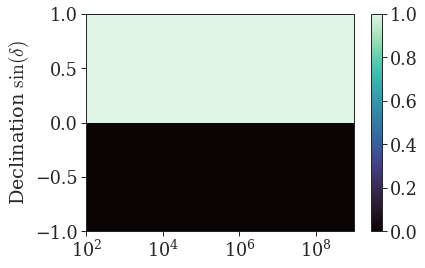

In [69]:
f, ax = plt.subplots()
p = ax.pcolormesh(
    ebins,
    sindec_bins, 
    aeff_dummy.T,
)
ax.set_xscale("log")
ax.set_xlim(1E2, 1E9)
ax.set_ylabel(r'Declination $\sin(\delta)$')
f.colorbar(p)

Text(0, 0.5, 'Declination $\\sin(\\delta)$')

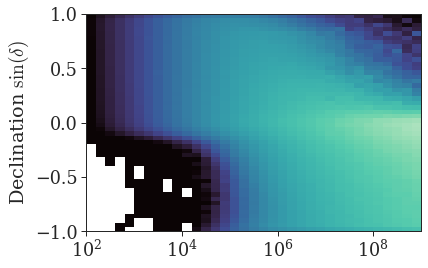

In [45]:
f, ax = plt.subplots()
ax.pcolormesh(
    ebins,
    sindec_bins, 
    aeff_2d["IceCube"].T,
    norm=LogNorm(),
    vmin=10,
    vmax=1E9,
)
ax.set_xscale("log")
ax.set_xlim(1E2, 1E9)
ax.set_ylabel(r'Declination $\sin(\delta)$')

In [42]:
generic_rotation[k][0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.86766839, 0.79870365, 0.69517525, 0.65245213, 0.61706664,
       0.59479336, 0.586085  , 0.57908243, 0.57414424, 0.60015657,
       0.59703933, 0.5852666 , 0.574346  , 0.56388429, 0.55349796,
       0.54349417, 0.53369757, 0.52410608, 0.50430014, 0.49485796,
       0.48513132, 0.4756893 , 0.46588306, 0.45629199, 0.44648329,
       0.43648177, 0.42609322, 0.41564343, 0.40472274, 0.39293841,
       0.37982294, 0.36583348, 0.35089547, 0.33389305, 0.31517459,
       0.29290133, 0.26751591, 0.23479267, 0.18125395, 0.11226767,
       0.        , 0.        , 0.        , 0.        , 0.        ])

0.84

In [7]:
import sys
sys.path.append('../core/')
from scipy.interpolate import UnivariateSpline
from settings import *